# Trending YouTube Video Statistics: CAvideos.csv数据集分析与预处理

#### 注：Trending YouTube Video Statistics数据集包含非常多.csv文件，每个文件代表不同国家的数据。经过我逐个查看，发现他们数据格式完全相同，故拿第一个文件CAvideos.csv文件做例子，其余的受篇幅限制不再赘述。

## 1.导入文件和使用的函数库，并查看前五行和基本信息

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/liuhao/Desktop/刘豪_3120191022//youtube-new/CAvideos.csv")
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


### 可以看出数据集有40881行，16列，其中标称属性8列，数值属性5列，二元属性3列，只有“description”属性有缺失值。

# 2.数据可视化和摘要

### 2.1 标称属性数据摘要：
上述表格给出的属性，共有8个标称属性，统计其频数

In [3]:
data['video_id'].value_counts()

UceaB4D0jpo    8
VYOjWnS4cMY    8
l_lblj8Cq0o    8
6ZfuNTqbHE8    8
VJwoSfTOhyM    7
              ..
tDy7hFbtGqU    1
0J6wRhWkw5Y    1
6BtuCa2PgEg    1
lNVoug_84wY    1
xe6o4ex7-YA    1
Name: video_id, Length: 24427, dtype: int64

In [4]:
data['trending_date'].value_counts()

18.06.03    200
18.05.01    200
18.06.05    200
18.20.02    200
17.30.12    200
           ... 
18.13.02    195
18.02.02    195
18.31.01    191
18.01.02    190
18.14.05    171
Name: trending_date, Length: 205, dtype: int64

In [5]:
data['title'].value_counts()

Most Popular Violin Covers of Popular Songs 2018 || Best Instrumental Violin Covers 2018             15
Drake - God's Plan (Official Audio)                                                                  15
Bruno Mars,Charlie Puth,Ed Sheeran Best Christmas Songs,Greatest Hits Pop Playlist Christmas 2018    13
Deleted video                                                                                        11
Merry Christmas 2018 - Top Christmas Songs Playlist 2018 - Best Christmas Songs Ever                 10
                                                                                                     ..
HAIRDRESSER REACTS TO AMERICAS NEXT TOP MODEL PT. 10 |bradmondo                                       1
You're Bad at Craigslist!                                                                             1
NCT U - BOSS (Color Coded Han|Rom|Eng Lyrics) | Hwalee                                                1
RuPaul's Drag Race S10E01 UNTUCKED: 10s Across The Board        

In [6]:
data['channel_title'].value_counts()

SET India          192
MSNBC              189
FBE                188
The Young Turks    186
REACT              183
                  ... 
HRK PRO              1
WINNER               1
Rymz Officiel        1
Dormtainment         1
Watchable            1
Name: channel_title, Length: 5076, dtype: int64

In [7]:
data['publish_time'].value_counts()

2017-12-20T23:00:00.000Z    11
2018-01-29T04:00:00.000Z    10
2018-03-11T16:00:00.000Z    10
2018-02-11T15:00:01.000Z    10
2017-11-18T17:00:00.000Z    10
                            ..
2018-04-17T05:11:05.000Z     1
2018-01-28T10:30:01.000Z     1
2018-02-19T12:00:05.000Z     1
2018-05-08T22:35:53.000Z     1
2018-05-06T23:50:45.000Z     1
Name: publish_time, Length: 23613, dtype: int64

In [8]:
data['tags'].value_counts()

[none]                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2385
the real|"daytime"|"talk show"|"women"|"tamera mowry"|"adrienne bailon"|"loni love"|"jeannie mai"                                                                                                                                                                                                                                                                                                                                                                          127
best vines 2018|"funny vines"|"funny videos"|"funniest videos 2018"       

In [9]:
data['thumbnail_link'].value_counts()

https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg    8
https://i.ytimg.com/vi/UceaB4D0jpo/default.jpg    8
https://i.ytimg.com/vi/l_lblj8Cq0o/default.jpg    8
https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg    8
https://i.ytimg.com/vi/KM38OFDKU20/default.jpg    7
                                                 ..
https://i.ytimg.com/vi/GCgVdw5zn-c/default.jpg    1
https://i.ytimg.com/vi/46rOzctIXX8/default.jpg    1
https://i.ytimg.com/vi/PK4zgEEqirk/default.jpg    1
https://i.ytimg.com/vi/LLkMdkoALbg/default.jpg    1
https://i.ytimg.com/vi/3l5OgRu92UY/default.jpg    1
Name: thumbnail_link, Length: 24422, dtype: int64

In [10]:
data['description'].value_counts()

Subscribers Link: http://bit.ly/2qb69dZ\n\nConnect with Radaan Media online: http://bit.ly/2rGVWHT\n\nVisit our WEBSITE: https://www.radaan.tv\n\nLike us on FACEBOOK: http://bit.ly/2qLmgTm\n\nFollow us on TWITTER: http://bit.ly/2r8gZGD\n\nVAANI RANI SYNOPSIS\nTwin sister’s Vaani and Rani get married to an elder and younger brother of the same family respectively. Vaani the elder one is a well read attorney and the younger one Rani is a failure in education with not even going beyond 10thclass. Though both have extreme ideologies of life Rani is a favorite among neighbors with her uncanny innocent approach. Vaani is a roaring lion at the court room who is looked up as a role model to so many upcoming lawyers for her advocating abilities, whereas Rani is a well versed home maker. Not only with the sisters remain with this extremity but even their respective husband’s share the same dose of luck….Vaani is a mother of 2 children and Rani has three children who are in their teens. Volcanoes

### 2.2 数值属性数据摘要：
上述表格给出的属性，共有5个数值属性，计算5数概括及缺失值的个数

In [11]:
def Five_Number_Summary_Null(x):
    return pd.Series([x.name,x.min(),x.quantile(.25),x.median(),x.quantile(.75),x.max(),x.isnull().sum()], 
                     index = ['数值属性:','Minimum:','Q1:','Median:','Q3:','Maximum:','缺失值个数:'])

Five_Number_Summary_Null(data['category_id'])

数值属性:       category_id
Minimum:              1
Q1:                  20
Median:              24
Q3:                  24
Maximum:             43
缺失值个数:                0
dtype: object

In [12]:
Five_Number_Summary_Null(data['views'])

数值属性:           views
Minimum:          733
Q1:            143902
Median:        371204
Q3:            963302
Maximum:    137843120
缺失值个数:              0
dtype: object

In [13]:
Five_Number_Summary_Null(data['likes'])

数值属性:         likes
Minimum:          0
Q1:            2191
Median:        8780
Q3:           28717
Maximum:    5053338
缺失值个数:            0
dtype: object

In [14]:
Five_Number_Summary_Null(data['dislikes'])

数值属性:       dislikes
Minimum:           0
Q1:               99
Median:          303
Q3:              950
Maximum:     1602383
缺失值个数:             0
dtype: object

In [15]:
Five_Number_Summary_Null(data['comment_count'])

数值属性:       comment_count
Minimum:                0
Q1:                   417
Median:              1301
Q3:                  3713
Maximum:          1114800
缺失值个数:                  0
dtype: object

### 2.3 数据可视化 

数值属性: category_id
缺失值个数: 0


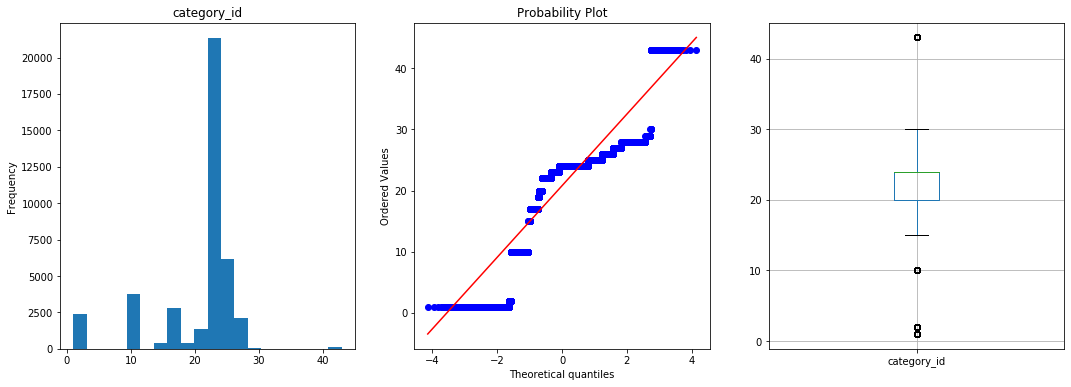

In [16]:
def visualize(x):
    print("数值属性:",x.name)
    print('缺失值个数:',x.isnull().sum())
    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    x.plot.hist(grid=False,bins=20,title=x.name)
    plt.subplot(132)
    stats.probplot(x, dist="norm", plot=plt)#检测数据分布
    plt.subplot(133)
    pd.DataFrame({x.name:x}).boxplot()
    plt.show()
    
visualize(data['category_id'])

### 数值属性"category_id"：由直方图可以看出，数据集中在20-30附近，由qq图看出数据点近似分布在一条直线附近，可能近似符合方差非常大的正态分布。由盒图可以看出有4个离群点。

数值属性: views
缺失值个数: 0


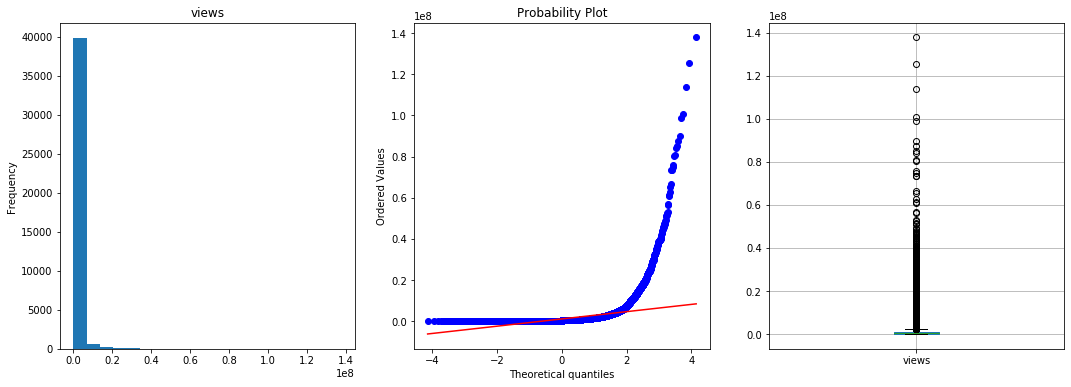

In [17]:
visualize(data['views'])

数值属性: likes
缺失值个数: 0


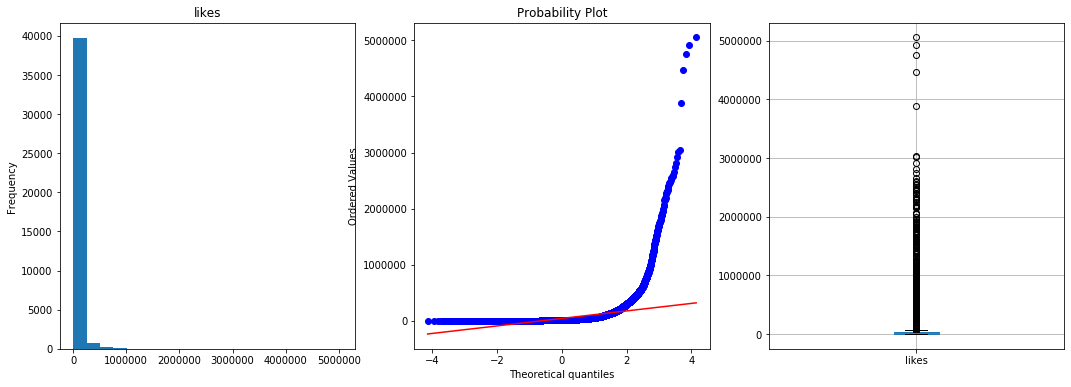

In [18]:
visualize(data['likes'])

数值属性: dislikes
缺失值个数: 0


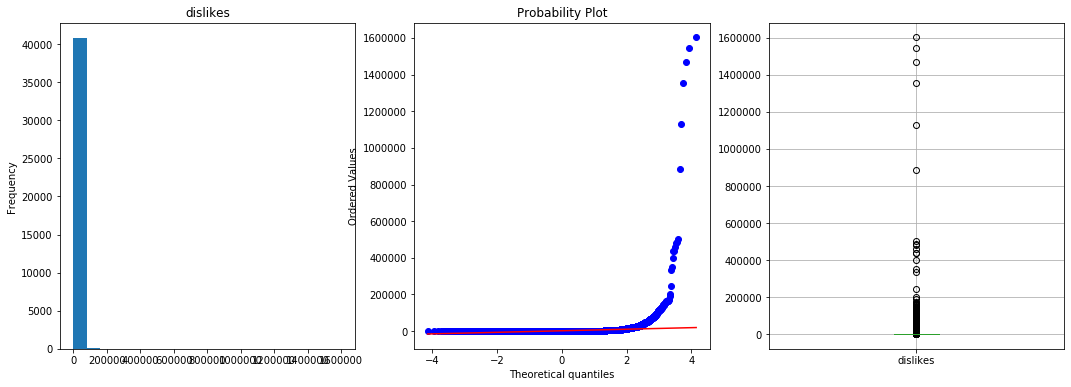

In [19]:
visualize(data['dislikes'])

数值属性: comment_count
缺失值个数: 0


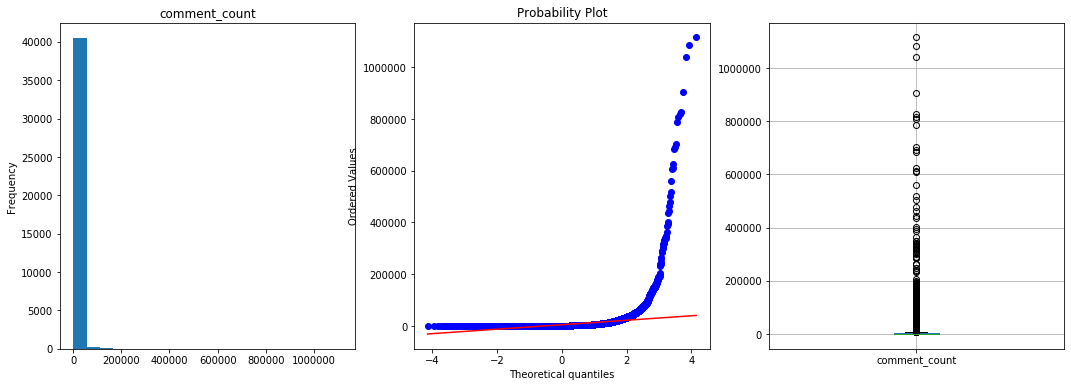

In [20]:
visualize(data['comment_count'])

### 数值属性"views"、"likes"、"dislikes"、"comment_count"：这四个数值属性除了数据的数量级有一些差别之外，具有一定的共同特性。views数量远大于其他三个，十分合理，因为非常多观看者不会进行反馈和评价。由直方图可以看出，四个数据绝大多数小于某一值，说明只有小部分视频具有非常高的热度。由qq图看出数据点不呈直线，说明了这四个数值属性不符合正态分布。由盒图可以看出有非常多的离群点。

# 3.数据缺失处理

### 只有"description"属性有1296个缺失值，缺失原因可能是有些视频没人去添加描述。

In [21]:
data['description'].isnull().sum()

1296

### 3.1 将缺失部分剔除

In [22]:
data_drop = data["description"].dropna()
data_drop.isnull().sum()

0

### 3.2 用最高频率值来填补缺失值

In [23]:
data_max = data["description"].fillna(data["description"].mode()[0])
data_max.isnull().sum()

0

### 3.3 通过属性的相关关系来填补缺失值，并重新可视化数据

### 3.4 通过数据对象之间的相似性来填补缺失值，并重新可视化数据

#### 3.3和3.4：description为一段长文本，相关关系和相似性度量没有一个很好的方法，故省略。在我的part1和part2作业中对数值属性的缺失有四个方法的完整分析过程，可以麻烦留意一下。